In [ ]:
from mmengine import Config
cfg = Config.fromfile('../work_dirs/mask2former_eva02_tiny_nwpu/mask2former_eva02_tiny_nwpu.py')

In [ ]:
import mmcv
import mmengine
from mmdet.apis import init_detector, inference_detector
from mmdet.utils import register_all_modules
# Choose to use a config and initialize the detector
config_file = '../work_dirs/mask2former_eva02_tiny_nwpu/mask2former_eva02_tiny_nwpu.py'
# Setup a checkpoint file to load
checkpoint_file = '../work_dirs/mask2former_eva02_tiny_nwpu/best_coco_bbox_mAP_epoch_255.pth'

# register all modules in mmdet into the registries
register_all_modules()

# build the model from a config file and a checkpoint file
model = init_detector(cfg, checkpoint_file, device='cuda:0')  # or device='cuda:0'


In [ ]:
# Use the detector to do inference
image = mmcv.imread('../data/NWPU/NWPU VHR-10 dataset/positive image set/230.jpg',channel_order='rgb')
result = inference_detector(model, image)
print(result)

In [ ]:
from mmdet.registry import VISUALIZERS
# init visualizer(run the block only once in jupyter notebook)
visualizer = VISUALIZERS.build(model.cfg.visualizer)
# the dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer.dataset_meta = model.dataset_meta

In [ ]:
# show the results
visualizer.add_datasample(
    'result',
    image,
    data_sample=result,
    draw_gt = None,
    wait_time=0,
)
visualizer.show()

In [ ]:
# 根据COCO格式的标注文件，生成可视化的标注结果
label_file = '../data/NWPU/VHR-10_dataset_coco/NWPU VHR-10_dataset_coco/annotations.json'

show_file = '../data/NWPU/NWPU VHR-10 dataset/positive image set/230.jpg'

In [1]:
import json
import cv2
from pycocotools.coco import COCO
from pycocotools import mask as maskUtils

# 标注文件路径
label_file = '../data/NWPU/VHR-10_dataset_coco/NWPU VHR-10_dataset_coco/annotations.json'

# 展示图片路径
show_file = '../data/NWPU/NWPU VHR-10 dataset/positive image set/230.jpg'

# 加载标注文件
with open(label_file, 'r') as f:
    label_data = json.load(f)

# 初始化COCO API
coco = COCO(label_file)

# 获取展示图片的ID
img_id = coco.getImgIds(imgIds=[show_file])[0]

# 获取展示图片的信息
img_info = coco.loadImgs(img_id)[0]

# 加载展示图片
img = cv2.imread(show_file)

# 获取展示图片的所有标注信息
ann_ids = coco.getAnnIds(imgIds=[img_id])
anns = coco.loadAnns(ann_ids)

# 可视化标注结果
for ann in anns:
    mask = maskUtils.decode(ann['segmentation'])
    color = (0, 255, 0)  # 标注框颜色
    thickness = 2  # 标注框线宽
    img = cv2.rectangle(img, (ann['bbox'][0], ann['bbox'][1]), (ann['bbox'][0]+ann['bbox'][2], ann['bbox'][1]+ann['bbox'][3]), color, thickness)
    img = cv2.addWeighted(img, 0.5, mask, 0.5, 0)

# 显示可视化结果
cv2.imshow('result', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

loading annotations into memory...
Done (t=0.05s)
creating index...
index created!


KeyError: '.'

In [ ]:
import json

# JSON文件路径
json_file = '../data/NWPU/VHR-10_dataset_coco/NWPU VHR-10_dataset_coco/annotations.json'

# 要查找的文件名
file_name = '../data/NWPU/NWPU VHR-10 dataset/positive image set/230.jpg'

# 加载JSON文件
with open(json_file, 'r') as f:
    data = json.load(f)

# 查找指定文件名的对象
for obj in data['images']:
    if obj['file_name'] == file_name:
        img_id = obj['id']
        break

# 输出结果
print('Image ID for file "{}": {}'.format(file_name, img_id))

In [ ]:
img_id

In [ ]:
file_name

In [ ]:
from mmdet.registry import VISUALIZERS
# init visualizer(run the block only once in jupyter notebook)
visualizer = VISUALIZERS.build(model.cfg.visualizer)
# the dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer.dataset_meta = model.dataset_meta


# show the results
visualizer.add_datasample(
    'result',
    image,
    data_sample=result,
    draw_gt = None,
    wait_time=0,
)
visualizer.show()

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


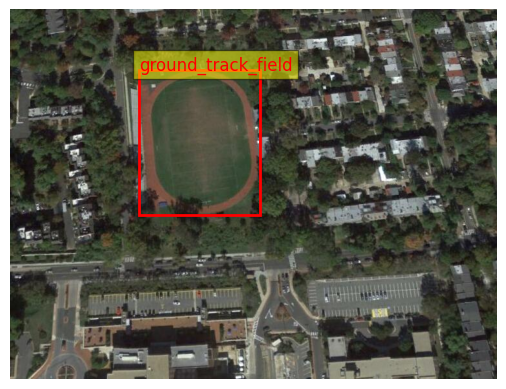

In [2]:
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io

# 载入COCO标注文件
label_file = '../data/NWPU/VHR-10_dataset_coco/NWPU VHR-10_dataset_coco/annotations.json'
coco = COCO(label_file)

# 获取图像ID
img_ids = coco.getImgIds(imgIds=[229])  # 在这里，229是你想要显示的图像的ID
img_info = coco.loadImgs(img_ids[np.random.randint(0,len(img_ids))])[0]

# 加载并显示图像
img = io.imread('../data/NWPU/NWPU VHR-10 dataset/positive image set/230.jpg')
plt.imshow(img)
plt.axis('off')

# 加载实例标注
ann_ids = coco.getAnnIds(imgIds=img_info['id'], iscrowd=None)
anns = coco.loadAnns(ann_ids)

# 获取类别信息
categories = coco.loadCats(coco.getCatIds())
cat_names = {cat['id']: cat['name'] for cat in categories}

# 自定义函数来绘制边界框和类别标签
def draw_bbox_and_labels(anns, cat_names):
    for ann in anns:
        bbox = ann['bbox']
        # 绘制边界框
        plt.gca().add_patch(plt.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], fill=False, edgecolor='red', linewidth=2))
        # 在左上角显示类别
        class_name = cat_names[ann['category_id']]
        plt.text(bbox[0], bbox[1], class_name, color='red', fontsize=12, bbox=dict(facecolor='yellow', alpha=0.5))

# 调用自定义函数
draw_bbox_and_labels(anns, cat_names)

plt.show()


loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


TypeError: COCO.showAnns() missing 1 required positional argument: 'anns'

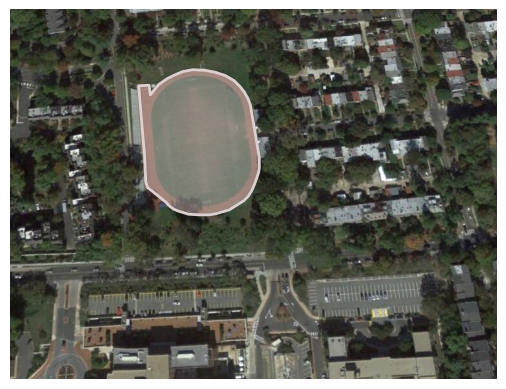

In [6]:
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import cv2 as cv

# 载入COCO标注文件
label_file = '../data/NWPU/VHR-10_dataset_coco/NWPU VHR-10_dataset_coco/annotations.json'
coco = COCO(label_file)

# 获取图像ID
img_ids = coco.getImgIds(imgIds=[229])  # 在这里，229是你想要显示的图像的ID
img_info = coco.loadImgs(img_ids[np.random.randint(0,len(img_ids))])[0]

# 加载并显示图像
img = io.imread('../data/NWPU/NWPU VHR-10 dataset/positive image set/230.jpg')
plt.imshow(img)
plt.axis('off')

# 加载并显示实例标注
ann_ids = coco.getAnnIds(imgIds=img_info['id'], iscrowd=None)
anns = coco.loadAnns(ann_ids)
# coco.showAnns(anns, draw_bbox=True)  # 设置 draw_bbox=True 来显示边界框
coco.showAnns(anns)  # 设置 draw_bbox=True 来显示边界框



for j in range(len(anns)):
    x1 = int(anns[j]['bbox'][0])
    y1 = int(anns[j]['bbox'][1] + anns[j]['bbox'][3])
    x2 = int(anns[j]['bbox'][0] + anns[j]['bbox'][2])
    y2 = int(anns[j]['bbox'][1])
    cv.rectangle(img,
                      (x1, y1),
                      (x2, y2),
                      (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)),
                      2)



plt.show()



In [ ]:
from mmdet.models import ResNet
import torch
self = ResNet(depth=18)
self.eval()
inputs = torch.rand(1, 3, 32, 32)
level_outputs = self.forward(inputs)
for level_out in level_outputs:
    print(tuple(level_out.shape))
